# 안녕하세요^^
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

# 판다스 행, 열 모두 보여주기
pd.set_option('display.max_rows', None) # 최대로 보여줄 행의 수 설정

pd.set_option('display.max_columns', None) # 최대로 보여줄 열의 수 설정

In [2]:
# 시각화 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')
sns.set(font="NanumGothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [3]:
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

# (실습준비) 데이터 불러오기부터

In [5]:
# 학습/평가 데이터 로딩
train_x = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/train_x.csv', sep=',')
train_y = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/train_y.csv', sep=',')
test_x = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/test_x.csv', sep=',')
test_y = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차part1(복습)/결과 데이터프레임/test_y.csv', sep=',')

In [6]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(43776, 6) (4320, 6) (43776, 1) (4320, 1)


---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [6]:
# LinearRegression 모델 불러오기
from sklearn.linear_model import LinearRegression

# 회귀 평가 지표 불러오기
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [8]:
# 아래에 실습코드를 작성하세요.
model1 = LinearRegression()
model1.fit(train_x, train_y)

LinearRegression()

In [9]:
print('훈련 세트 점수 : ', model1.score(train_x, train_y))
print('평가 세트 점수 : ', model1.score(test_x, test_y))

훈련 세트 점수 :  0.7918200253355155
평가 세트 점수 :  0.7200775423986912


In [10]:
pred_y = model1.predict(test_x)

In [11]:
print('RMSE : ', mean_squared_error(test_y, pred_y) ** 0.5) # RMSE는 오차로써 작을수록 좋다.
print('r2 score : ', r2_score(test_y, pred_y))

RMSE :  1877.142923630923
r2 score :  0.7200775423986912


### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV # 그리드 서치
from sklearn.model_selection import RandomizedSearchCV # 랜덤 서치

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [8]:
model2 = RandomForestRegressor(n_estimators=100,  max_depth=4, n_jobs=-1)
model2.fit(train_x, train_y)

<ipython-input-8-eeb1b6229638>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(train_x, train_y)


RandomForestRegressor(max_depth=4, n_jobs=-1)

In [9]:
print('훈련 세트 점수 : ', model2.score(train_x, train_y))
print('평가 세트 점수 : ', model2.score(test_x, test_y))

훈련 세트 점수 :  0.7965539558590361
평가 세트 점수 :  0.7408953292562348


In [10]:
pred_y = model2.predict(test_x)

In [11]:
print('RMSE : ', mean_squared_error(test_y, pred_y) ** 0.5) # RMSE는 오차로써 작을수록 좋다.
print('r2 score : ', r2_score(test_y, pred_y))

RMSE :  1805.9931149818076
r2 score :  0.7408953292562346


#### [실습문제3]
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

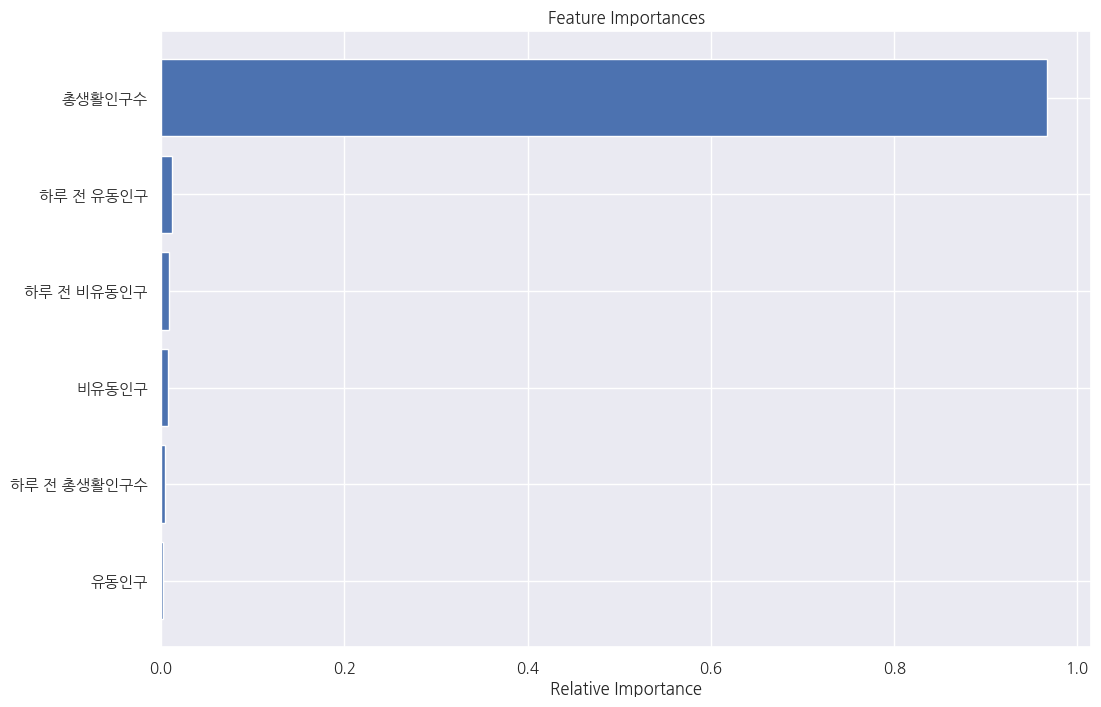

In [17]:
# 피처 중요도
importances = model2.feature_importances_

# 인덱스를 중요도로 정렬
indices = np.argsort(importances)

# 피처 이름
features = train_x.columns

# 시각화
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [18]:
# 확인할 수 있는 인사이트
# 1.여성 중년기, 청년기 생활 인구 수가 모델 성능에 막대한 영향력을 미친다.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [20]:
# 아래에 실습코드를 작성하세요.
model3 = GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.01, random_state=42)
model3.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          random_state=42)

In [21]:
# 아래에 실습코드를 작성하세요.
print('훈련 세트 점수 : ', model3.score(train_x, train_y))
print('평가 세트 점수 : ', model3.score(test_x, test_y))

훈련 세트 점수 :  0.8153847089937892
평가 세트 점수 :  0.7491824209904054


In [22]:
pred_y = model3.predict(test_x)

In [23]:
# 아래에 실습코드를 작성하세요.
print('RMSE : ', mean_squared_error(test_y, pred_y) ** 0.5) # RMSE는 오차로써 작을수록 좋다.
print('r2 score : ', r2_score(test_y, pred_y))

RMSE :  1776.8773653474057
r2 score :  0.7491824209904054


#### [실습문제5]
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

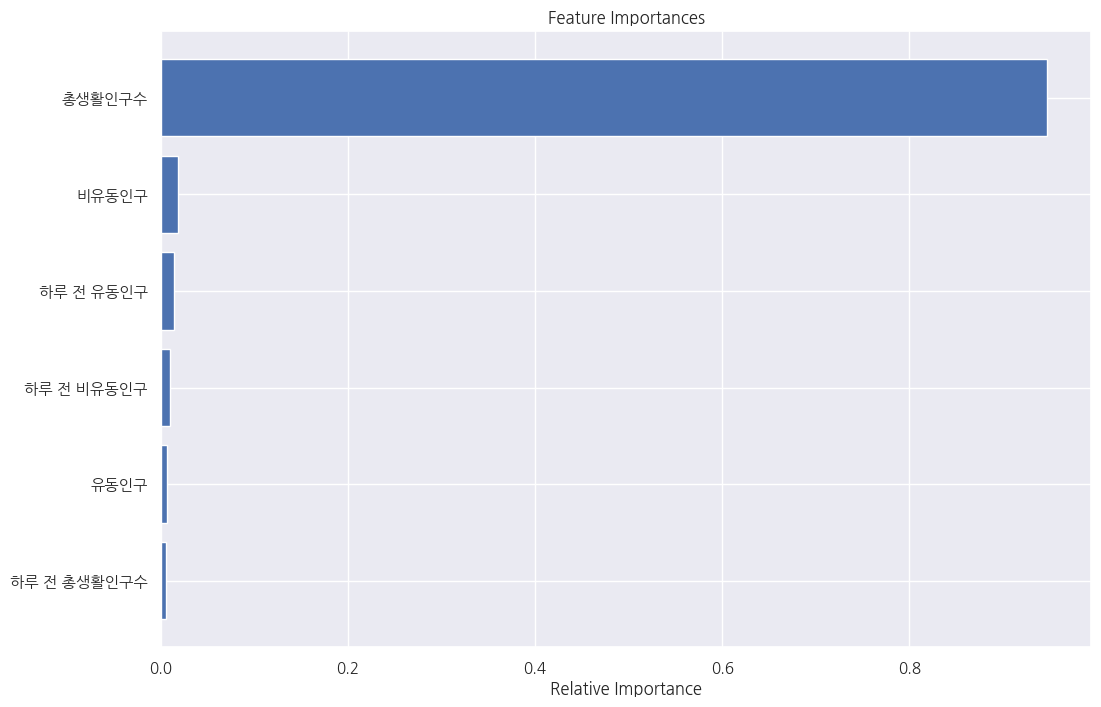

In [24]:
# Feature의 중요도 확인
# 피처 중요도
importances = model3.feature_importances_

# 인덱스를 중요도로 정렬
indices = np.argsort(importances)

# 피처 이름
features = train_x.columns

# 시각화
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [25]:
# 확인할 수 있는 인사이트
# 1.여전히 여성 중년기, 청년기 생활인구수가 모델에 영향력을 미치는 것을 알 수 있다.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

In [26]:
from sklearn.linear_model import Ridge

#### [실습문제6] 머신러닝_6 (Ridge, 릿지)
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [27]:
# 표준 정규화
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(train_x)
train_scaled_x = ss.transform(train_x)
test_scaled_x = ss.transform(test_x)

In [28]:
# 규제 alpha를 돌아다니면서 모델의 최적 성능을 확인한다.

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled_x, train_y)
    train_score.append(ridge.score(train_scaled_x, train_y))
    test_score.append(ridge.score(test_scaled_x, test_y))

In [29]:
train_score

[0.791814121242682,
 0.7918141212039523,
 0.791814117418387,
 0.7918137428437773,
 0.7917795455178055,
 0.7897463885658838]

In [30]:
test_score

[0.7200976518465606,
 0.7200981923611318,
 0.7201035884931027,
 0.7201566638039798,
 0.7206104060136752,
 0.7214603615259738]

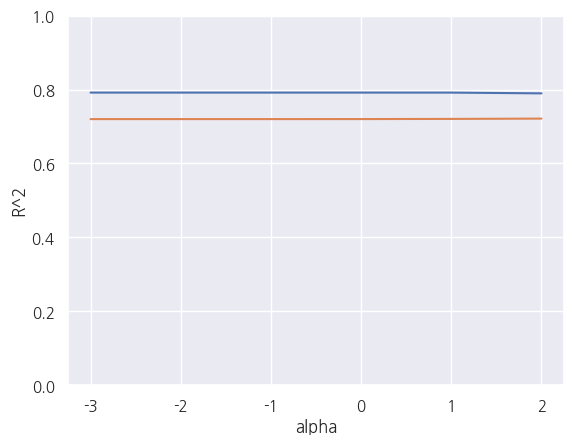

In [31]:
# 시각화 하니까 이 코드 흐름대로 결과를 보여주는 것 같긴 한데 결과 자체가 뭔가 맞게 결과를 내주었는가? 하는 의심이 든다...
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim([0, 1])
plt.show()

<h1> XGBoost

In [32]:
from xgboost import XGBRegressor

In [33]:
model5 = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, )
model5.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
# 아래에 실습코드를 작성하세요.
print('훈련 세트 점수 : ', model5.score(train_x, train_y))
print('평가 세트 점수 : ', model5.score(test_x, test_y))

훈련 세트 점수 :  0.8393539661683178
평가 세트 점수 :  0.7455155437139623


In [35]:
pred_y = model5.predict(test_x)

In [36]:
# 아래에 실습코드를 작성하세요.
print('RMSE : ', mean_squared_error(test_y, pred_y) ** 0.5) # RMSE는 오차로써 작을수록 좋다.
print('r2 score : ', r2_score(test_y, pred_y))

RMSE :  1789.8189417865697
r2 score :  0.7455155437139623


* 그리드 서치

In [143]:
params = {
    'max_depth' : range(1, 31, 1),
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.05, 0.1, 0.2],
}

In [144]:
grid_xgboost = GridSearchCV(XGBRegressor(), params, cv = 5, n_jobs = -1, verbose=True)

grid_xgboost.fit(train_x, train_y)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': range(1, 31),
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             verbose=True)

In [148]:
grid_xgboost.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [145]:
# 아래에 실습코드를 작성하세요.
print('훈련 세트 점수 : ', grid_xgboost.score(train_x, train_y))
print('평가 세트 점수 : ', grid_xgboost.score(test_x, test_y))

훈련 세트 점수 :  0.8145117325691043
평가 세트 점수 :  0.7503181055669121


In [146]:
pred_y = grid_xgboost.predict(test_x)

In [147]:
# 아래에 실습코드를 작성하세요.
print('RMSE : ', mean_squared_error(test_y, pred_y) ** 0.5) # RMSE는 오차로써 작을수록 좋다.
print('r2 score : ', r2_score(test_y, pred_y))

RMSE :  1772.850012635655
r2 score :  0.7503181055669121


#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

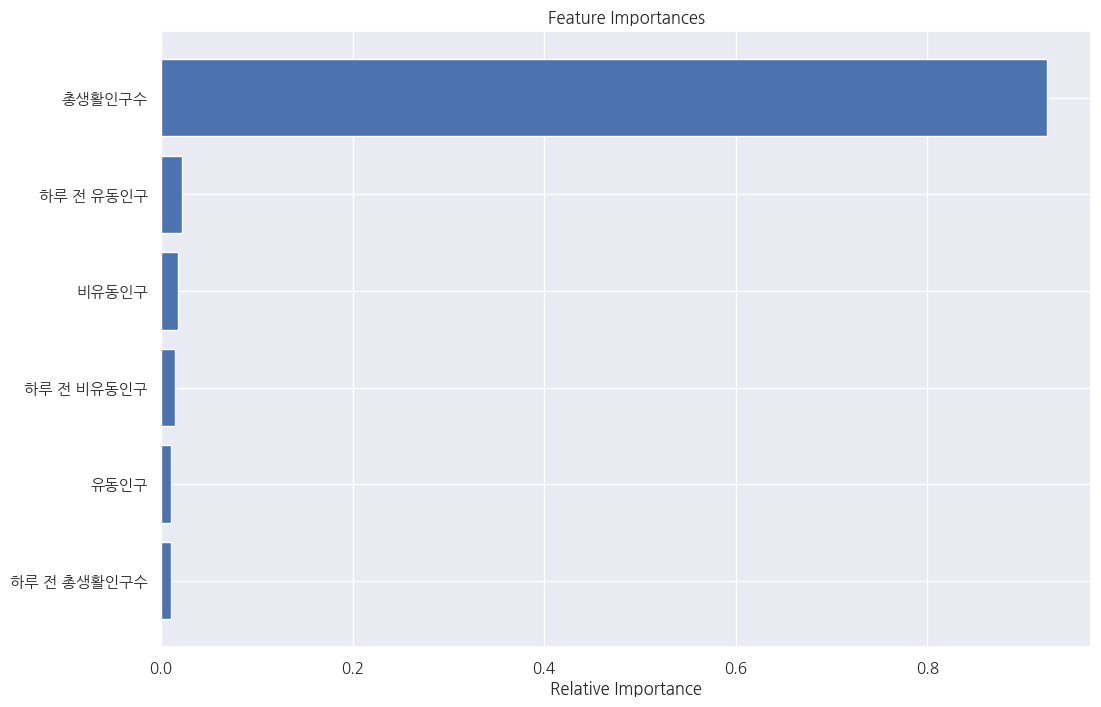

In [37]:
# Feature의 중요도 확인
# 피처 중요도
importances = model5.feature_importances_

# 인덱스를 중요도로 정렬
indices = np.argsort(importances)

# 피처 이름
features = train_x.columns

# 시각화
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### [실습문제8] 스케일링
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요.

* 저는 일단 Ridge 할떄 MinMax Scaling을 사용했으므로 여기는 건너 뛰겠습니다.


In [39]:
# 아래에 실습코드를 작성하세요.




In [40]:
# 아래에 실습코드를 작성하세요.



---

# 2. Deep Learning
## 이번엔 딥러닝 모델링을 해봅시다.

In [82]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization, Activation

In [83]:
print(train_scaled_x.shape, test_scaled_x.shape)

(43776, 6) (4320, 6)


In [84]:
print(train_y.shape, test_y.shape)

(43776, 1) (4320, 1)


In [85]:
# 사용자 정의 RMSE 메트릭
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [92]:
# 사용자 정의 R^2 메트릭
def r_squared(y_true, y_pred):
    y_mean = tf.reduce_mean(y_true)
    ss_tot = tf.reduce_sum(tf.square(y_true - y_mean))
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    return 1 - (ss_res / ss_tot)

(43776, 6)

#### [실습문제9] 딥러닝

* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [125]:
# 아래에 실습코드를 작성하세요.
model6 = Sequential()

model6.add(Dense(256, activation='swish', input_shape=(train_scaled_x.shape[1],), name='hidden1'))

model6.add(Dense(128, activation='swish', name='hidden2'))

model6.add(Dense(64, activation='swish', name='hidden3'))

model6.add(Dense(1)) # 출력층

model6.compile(optimizer=Adam(learning_rate=0.1), loss='mse', metrics=[root_mean_squared_error, r_squared]) # metrics : RMSE, R^2

In [122]:
model6.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 256)               1792      
                                                                 
 hidden2 (Dense)             (None, 128)               32896     
                                                                 
 hidden3 (Dense)             (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 43009 (168.00 KB)
Trainable params: 43009 (168.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8,  restore_best_weights=True) # 과대 적합을 막기 위함
history = model6.fit(train_scaled_x, train_y, epochs=15, batch_size=128, validation_split=0.2, callbacks=early_stopping)

Epoch 1/15
274/274 [==============================] - 1s 4ms/step - loss: 4126415.2500 - root_mean_squared_error: 2022.5896 - r_squared: 0.7785 - val_loss: 3558343.5000 - val_root_mean_squared_error: 1862.4211 - val_r_squared: 0.3421
Epoch 2/15
274/274 [==============================] - 1s 4ms/step - loss: 4218050.0000 - root_mean_squared_error: 2042.5071 - r_squared: 0.7730 - val_loss: 2135236.2500 - val_root_mean_squared_error: 1434.7898 - val_r_squared: 0.6157
Epoch 3/15
274/274 [==============================] - 1s 4ms/step - loss: 4245528.5000 - root_mean_squared_error: 2049.5894 - r_squared: 0.7722 - val_loss: 2050446.3750 - val_root_mean_squared_error: 1407.9730 - val_r_squared: 0.6307
Epoch 4/15
274/274 [==============================] - 1s 4ms/step - loss: 4156503.2500 - root_mean_squared_error: 2027.9370 - r_squared: 0.7768 - val_loss: 2074631.5000 - val_root_mean_squared_error: 1422.3781 - val_r_squared: 0.6272
Epoch 5/15
274/274 [==============================] - 1s 4ms/ste

In [142]:
# 아래에 실습코드를 작성하세요.
predictions = model6.predict(test_scaled_x)

print('r2 : ', r2_score(test_y, predictions))

135/135 [==============================] - 0s 1ms/step
r2 :  0.7385214993886177


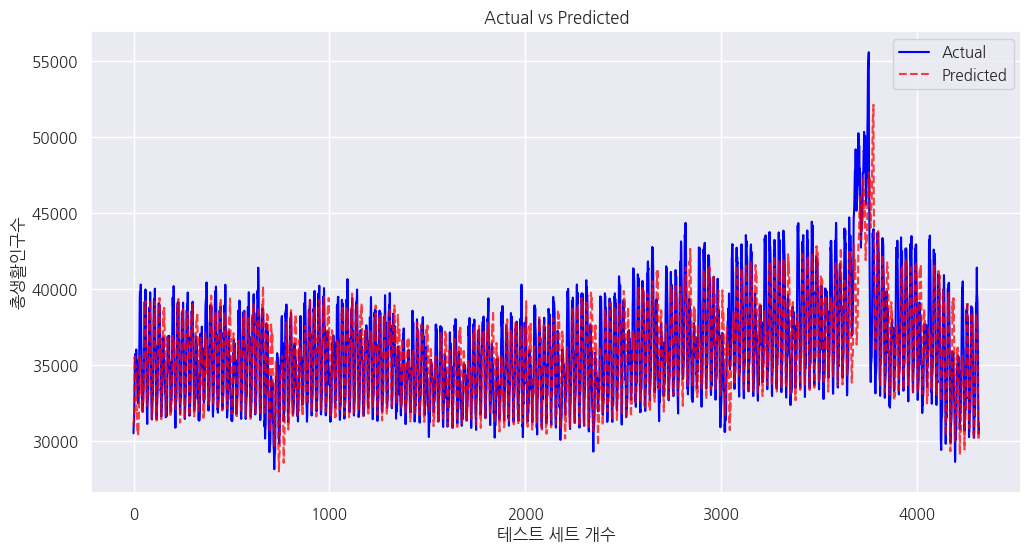

In [115]:
# 예측값과 실제값 비교 시각화
plt.figure(figsize=(12, 6))
plt.plot(np.array(test_y), label='Actual', color='blue')
plt.plot(predictions, label='Predicted', alpha = 0.75, linestyle='--', color='red')
plt.xlabel('테스트 세트 개수')
plt.ylabel('총생활인구수')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [52]:
# 아래에 실습코드를 작성하세요.
history.history

{'loss': [261504448.0,
  8350212.0,
  7972902.0,
  7582984.0,
  7283502.5,
  7001963.5,
  6948931.0,
  6749769.5,
  6687619.5,
  6711562.0,
  6663715.5,
  6650102.5,
  6595571.5,
  6608808.0,
  6611544.0,
  6563146.5,
  6549415.5,
  6637093.0],
 'root_mean_squared_error': [10619.90625,
  2858.914306640625,
  2792.826416015625,
  2722.8173828125,
  2666.7998046875,
  2610.916748046875,
  2601.459228515625,
  2564.23828125,
  2551.356689453125,
  2556.121337890625,
  2546.740234375,
  2542.60986328125,
  2534.2978515625,
  2534.466796875,
  2533.83349609375,
  2524.04541015625,
  2523.80615234375,
  2540.7314453125],
 'r_squared': [-13.944207191467285,
  0.5327093005180359,
  0.5517288446426392,
  0.574617862701416,
  0.5893653631210327,
  0.6066219806671143,
  0.6096433997154236,
  0.6205861568450928,
  0.6237601041793823,
  0.6237718462944031,
  0.6248906254768372,
  0.6280223727226257,
  0.6296117305755615,
  0.6270077228546143,
  0.6280074715614319,
  0.6326555609703064,
  0.63239365

<h1> 느낀점 </h1>

* 역시 모델은 만든다는 것은 불확실성의 영역인 것 같다. 우리가 중요하다고 생각했던 변수를 이용해서 무조건 모델의 성능을 향상시킨다고 보장하는 것도 아니며, 우리가 중요하지 않다고 생각하는 변수를 버림으로써 무조건 모델의 성능을 향상시킨다고 보장하는 것도 아니다.

* 즉 모델의 성능을 향상시키기 위해 어떤 길을 가더라도 불확실한 그런 찜찜한 마음을 한 켠에 느낀다.(개인적으로)<br>진짜 일일히 모든 경우의 수를 찾아 노가다가 이루어질 수 있구나 하는 생각이 들었다.

* 이 프로젝트에서는 어떤 변수를 갖고 해도 결국은 다중 공선성 문제를 피해갈 수 없었다.

* 대체로 머신러닝, 딥러닝 모두 성능이 좋은편은 아니겠지만 일반적으로 추세를 잘 따라간다고 할 수 있다.